In [ ]:
!pip install googlemaps

In [ ]:
import requests
import nltk
import spacy
import googlemaps
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
import re
import csv
nltk.download('stopwords')
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
API_KEY = "Put your API_Key here"
map_client = googlemaps.Client(API_KEY)

In [ ]:
places = []
keywords = ["drunk", "drink", "driving", "drive", "speed", "speeding", "overspeeding", "knocked down", "knock down", \
           "drinking", "crashed", "crashing", "crash", "road", "accidents", "accident", "homicide"\
            "fatal", "roads", ""]
def ProperNounExtractor(text):
  # print("Text: ",text)
  places = []
  # for wd in keywords:
    # places = []
    
    # try:
  if not isinstance(text,float):
    places = []
    # if wd in text:
    if ((("accident" in text) or ("accidents" in text) or ("crash" in text) or ("crashed" in text) or ('hit' in text)) or (("mishap" in text) or \
        ("roads" in text) or ("roads" in text) or ("drunk" in text) or ("drinking" in text) or ("drink" in text) or\
        ("speed" in text) or ("speeding" in text) or ("overspeeding" in text) or ("knocked down" in text) or\
        ("knock down" in text) or ('driving' in text) or('driven' in text) or ('drunken') in text) or\
        ('rammed' in text)):
        sentences = nltk.sent_tokenize(text)
        for sentence in sentences:
            words = nltk.word_tokenize(sentence)
            words = [word for word in words if word not in set(stopwords.words('english'))]
            tagged = nltk.pos_tag(words)
            for i, (word, tag) in enumerate(tagged):
                if tag == 'NNP':
                    word = word.rstrip()
                    if word == "Nagar" or word == "Colony" or word == "junction" or word == "district":
                        prev_word = tagged[i-1][0]
                        final_word = prev_word + " " + word
                        word = final_word
                    try:
                        long_name = map_client.geocode(word)[0]['address_components'][0]['long_name']
                        short_name = map_client.geocode(word)[0]['address_components'][0]['short_name']
                        pattern = "^[A-Za-z]*$"
                        if long_name in word:
                            places.append(long_name)
                        elif short_name in word:
                            places.append(long_name)
                        elif bool(re.match(pattern,long_name)):
                            places.append(long_name)
                    except:
                        pass
    else:
      print("Keywords not present:    ", text)
  # print(set(places))
  return set(places)

  



header = ['date', 'accident_areas', 'article', 'summary']
record = []
rows = []
# dt = dict()
df = pd.read_excel('Google News_2014-2022.xlsx')
with open('accident_prone_701-1200.csv', 'a', encoding='UTF8', newline='') as f:
  for row in range(701,1201):
  
      record.append(df.loc[row, 'Date'])
      record.append(ProperNounExtractor(df.loc[row, 'Article']))
      record.append(df.loc[row, 'Article'])
      record.append(df.loc[row, 'Summary'])
      writer_object = csv.writer(f)
      writer_object.writerow(record)
      print(record)
      record = []
  f.close()
      # rows.append(dt)




print("Done")

['Sep 22, 2019', {'Malakpet', 'Kukatpally', 'Tijuana', 'Nampally', 'Hyderabad', 'Ameerpet'}, "By Express News Service\n\nHYDERABAD: In a freak incident, a 26-year-old woman who was standing underneath the elevated Ameerpet Metro station, died after a portion of the surface wall collapsed on her.\n\nThe woman identified as Mounika, a homemaker from Kukatpally, was standing in the pedestrian zone, taking cover from the heavy rain on Sunday evening.\n\nHyderabad Metro Rail authorities stated that the mishap took place when some small plaster pieces fell off from a surface wall of the station. The sharp edge of the piece fell on Monica's head from about nine meters height and she, unfortunately, succumbed to the head injury while she was being taken to a nearby hospital by L&T personnel.\n\nMeanwhile, huge police forces along with L&T security were deployed at the spot and the premises were cordoned off. However, the metro train services operated without any disruption from the incident.\n

In [ ]:
map_client.geocode('Telangana')[0]['address_components'][1]['long_name']

'India'

In [ ]:
map_client.geocode('Pedda')[0]['formatted_address']


'Ragannaguda, Manneguda, Telangana 501510, India'

In [ ]:
map_client.geocode('Nalagandla')

[{'address_components': [{'long_name': 'Nalagandla',
    'short_name': 'Nalagandla',
    'types': ['locality', 'political']},
   {'long_name': 'Ranga Reddy',
    'short_name': 'R.R. District',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'Telangana',
    'short_name': 'TG',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'India',
    'short_name': 'IN',
    'types': ['country', 'political']},
   {'long_name': '500019', 'short_name': '500019', 'types': ['postal_code']}],
  'formatted_address': 'Nalagandla, Telangana 500019, India',
  'geometry': {'bounds': {'northeast': {'lat': 17.4826786, 'lng': 78.319499},
    'southwest': {'lat': 17.4464637, 'lng': 78.293723}},
   'location': {'lat': 17.4747785, 'lng': 78.3102918},
   'location_type': 'APPROXIMATE',
   'viewport': {'northeast': {'lat': 17.4826786, 'lng': 78.319499},
    'southwest': {'lat': 17.4464637, 'lng': 78.293723}}},
  'place_id': 'ChIJW7VICNqSyzsR_YH_QKDXHYs',
  'typ

In [ ]:
ac1 = pd.read_csv('accident_prone_0-100.csv', names =['date', 'accident_areas', 'article', 'summary'])
ac2 = pd.read_csv('accident_prone_100-200.csv', names =['date', 'accident_areas', 'article', 'summary'])
ac3 = pd.read_csv('accident_prone_201-300.csv', names =['date', 'accident_areas', 'article', 'summary'])
ac4 = pd.read_csv('accident_prone_301-400.csv', names =['date', 'accident_areas', 'article', 'summary'])
ac5 = pd.read_csv('accident_prone_401-500.csv', names =['date', 'accident_areas', 'article', 'summary'])
ac6 = pd.read_csv('accident_prone_501-700.csv', names =['date', 'accident_areas', 'article', 'summary'])
ac7 = pd.read_csv('accident_prone_701-1200.csv', names =['date', 'accident_areas', 'article', 'summary'])
df1 = pd.concat([ac1, ac2, ac3, ac4, ac5, ac6, ac7], sort=False, ignore_index=True)

In [ ]:
df1.head()

,date,accident_areas,article,summary
0,"Jan 10, 2022","{'Anantapur', 'Kukatpally Housing Board Colony...",HYDERABAD: A 28-year-old call centre worker di...,HYDERABAD: A 28-year-old call centre worker di...
1,"Jan 10, 2022","{'Bahadurguda', 'Kukatpally Housing Board Colo...",Hyderabad: A software engineer died in a tragi...,Hyderabad: A software engineer died in a tragi...
2,"Jan 10, 2022","{'Bahadurguda', 'Kukatpally Housing Board Colo...",Hyderabad: A software engineer died in a road ...,Hyderabad: A software engineer died in a road ...
3,"Jan 10, 2022","{'Hyderabad', 'Kukatpally Housing Board Colony...",Kukatpalli: A major road accident has happened...,Kukatpalli: A major road accident has happened...
4,"Jan 09, 2022","{'Bahadurguda', 'Kukatpally', 'Sagar', 'Hydera...",A fatal road accident took place at KPHB colon...,A fatal road accident took place at KPHB colon...


In [ ]:
df1['accident_areas'] =  df1['accident_areas'].apply(lambda x: x.replace('}','').replace('{','')) 

In [ ]:
df1 = df1.dropna()


In [ ]:
df1.to_csv('Combined_accidents-2015-2022.csv', index = False)

In [ ]:
df1.reset_index(inplace = True)

In [ ]:
df1 = df1.set_index('accident_areas')
for id in df1.index:
  if  'set()' in id.strip(' '):
    print('yes')
    try:
      df1.drop(id, axis = 0, inplace=True)
    except:
      pass

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [ ]:
df1.reset_index(level=0, inplace=True)
for ar in range(df1.shape[0]):
  if df1.loc[ar, 'accident_areas'].strip(' ') == 'set()':
    print("Text:\n ",df1.loc[ar, 'article'])

In [ ]:
areas = dict()
for area in range(df1.shape[0]):
  splits = df1.loc[area, 'accident_areas'].split(',')
  for split in splits:
    if split.strip(' ') not in areas.keys():
      areas[split.strip(' ')] = 1
    else:
      areas[split.strip(' ')] += 1
  # print(splits)
  # break
# print(areas)

In [ ]:
## for 0-100
areas['Tank Bund stretch'] = 1
## for 301-400
areas['Kandawada-Malkapur outskirts'] = 1
## for 401-500
areas["'Madhapur'"] += 1
## for 501-700
areas['Hitec City'] = 1
areas['BanjaraHills'] = 1
## for 701-1200
areas['Bhainsa'] = 1

In [ ]:
print(areas)

{"'Anantapur'": 16, "'Kukatpally Housing Board Colony'": 22, "'Nagole'": 10, "'Sakram'": 1, "'Shawnee'": 34, "'Kukatpally'": 55, "'Tadipatri'": 2, "'Bahadurguda'": 24, "'Hyderabad'": 790, "'A'": 53, "'Sagar'": 34, "'Click'": 29, "'Telangana'": 247, "'Netherlands'": 2, "'Asif Nagar'": 6, "'Haaglanden'": 1, "'Schilderswijk'": 1, "'Medchal'": 24, "'Khairtabad'": 13, "'Munirabad'": 1, "'Tupran'": 2, "'Chintapalle'": 4, "'Visakhapatnam'": 16, "'Lambasingi'": 1, "'Sangareddy'": 19, "'Sai'": 86, "'Tirumala'": 6, "'Patancheruvu'": 20, "'Isnapur'": 2, "'Gachibowli'": 141, "'Kondapur'": 28, "'Relief'": 2, "'N'": 3, "'Chaderghat'": 9, "'Nanakaramguda'": 4, "'Roy'": 3, "'Bihar'": 7, "'Accident'": 64, "'Jal'": 1, "'Warangal'": 16, "'Bibinagar'": 3, "'Medak'": 8, "'Secunderabad'": 55, "'Chowki'": 2, "'Madhapur'": 111, "'Miyapur'": 13, "'Punjagutta'": 25, "'Sanjeeva Reddy Nagar'": 7, "'Deputy'": 30, "'Cyberabad'": 129, "'Nalgonda'": 86, "'Siddipet'": 14, "'Goshamahal'": 2, "'Ramnagar'": 2, "'Carrollt

In [ ]:
df3 = pd.DataFrame(areas.items(), columns=['accident_areas', 'count'])
df3 = df3.set_index('accident_areas')

In [ ]:
df3 = df3.sort_values(by=['count'], ascending=False, ignore_index = False)
# df3.head(20)

In [ ]:
for id in df3.index:
  try:
      if ("Telangana" in map_client.geocode(id.strip(' '))[0]['formatted_address'])\
        or ("Hyderabad" in map_client.geocode(id.strip(' '))[0]['formatted_address']):
        pass
      else:
        df3.drop(id, axis = 0, inplace=True)
        # print(id)
  except:
    pass

In [ ]:
to_be_removed = ["'Hyderabad'","'Telangana'", "''"]

In [ ]:
# rmv = list(df3['accident_areas'])
# for ar in range(df3.shape[0]):
for id in df3.index:
  for rem in to_be_removed:
    # print(id, ":", rem)
    # print(rmv[ar], ":", rem)
    if rem == id.strip(" "):
      print(id, ":", rem)
      try:
        df3.drop(id, axis = 0, inplace=True)
      except:
        pass

      


'Hyderabad' : 'Hyderabad'
'Telangana' : 'Telangana'
'' : ''


In [ ]:
df3.reset_index(level=0, inplace=True)

In [ ]:
df3.to_csv('Accidents_count.csv', index = False)

In [ ]:
df3

,accident_areas,count
0,'Gachibowli',141
1,'Cyberabad',129
2,'Madhapur',111
3,'Nalgonda',86
4,'Secunderabad',55
...,...,...
439,'JB Colony',1
440,'Sathupally',1
441,'Annaram',1
442,'Kadthal',1


In [ ]:
import seaborn as sns
import matplotlib as mpl

In [ ]:
mpl.rcParams.update({"axes.grid" : True, "grid.color": "white"})

In [ ]:
sns.set(font_scale = 1)

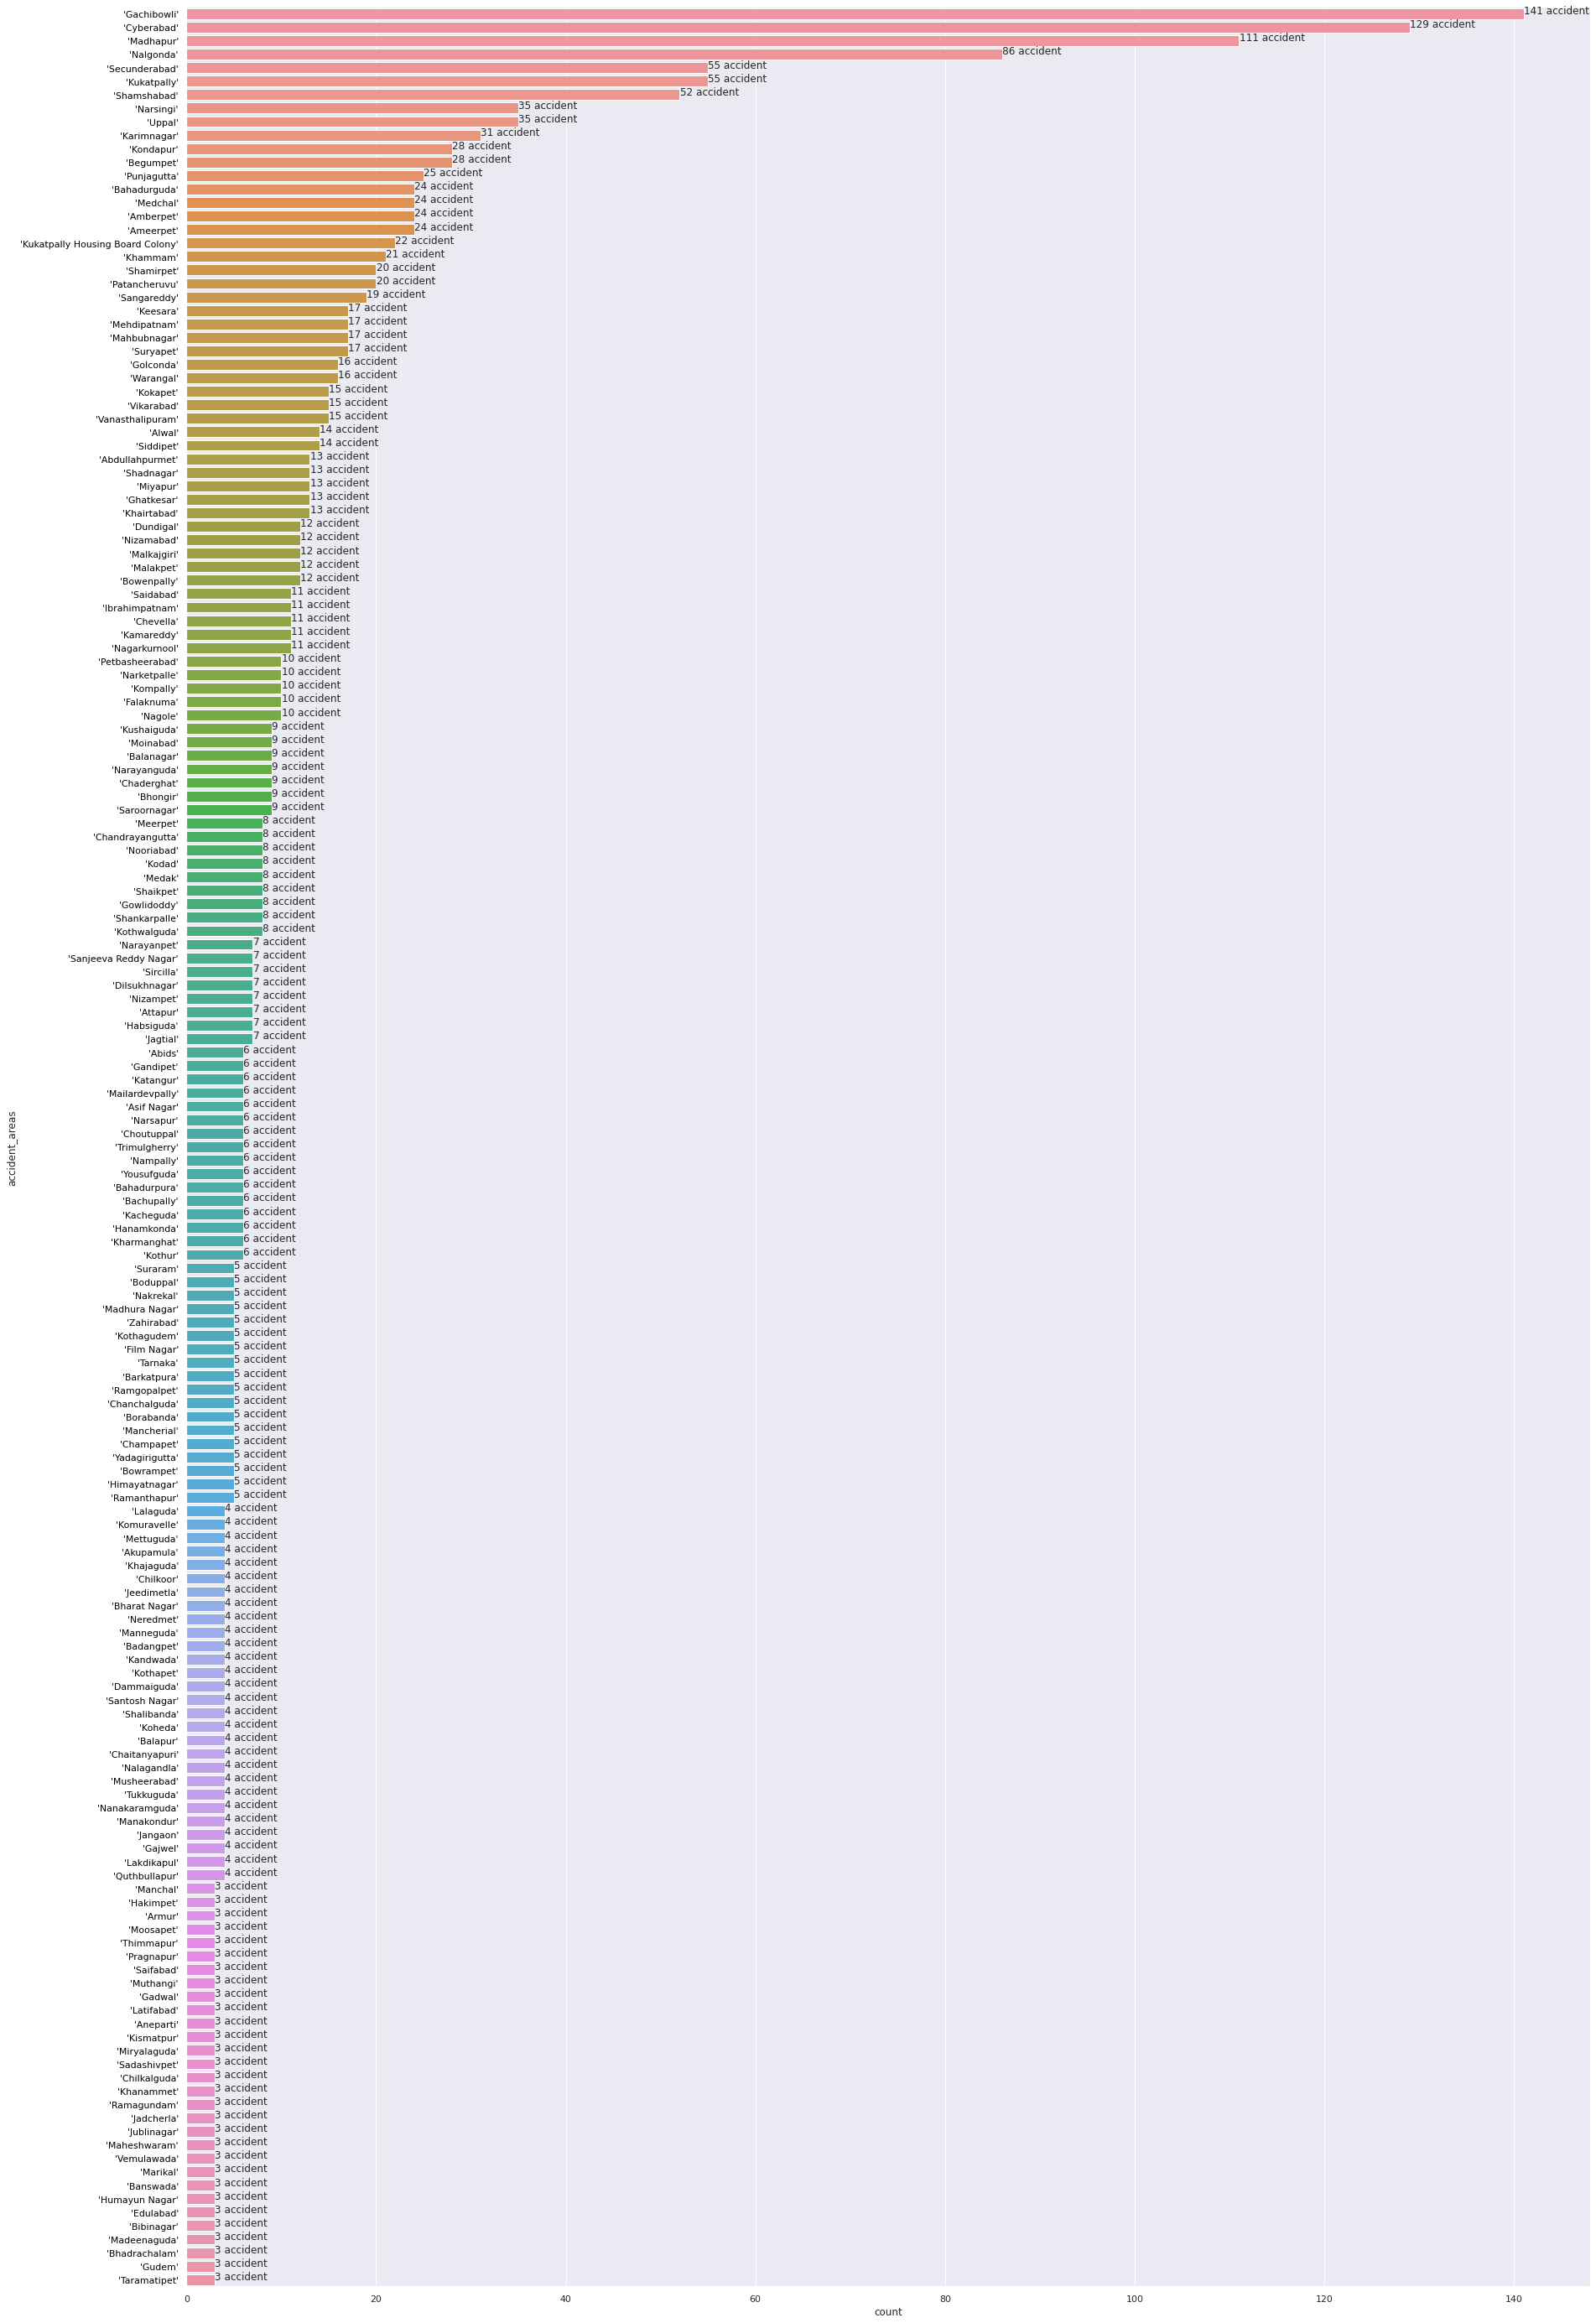

In [ ]:
plt.figure(figsize=(30,50))
ax = sns.barplot(y = "accident_areas",
            x = "count",
            data = df3[df3['count']>2].iloc[0:])
ax.tick_params(axis='y', colors='black') 
for p in ax.patches:
    percentage ='{:,.0f} accident'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))